# Libraries

In [1]:
# Google Drive
#from google.colab import drive

# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

# NN
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.image import convert_image_dtype
from tensorflow.data.experimental import AUTOTUNE
from keras.applications import MobileNetV2
from keras.applications import VGG16
from tensorflow.keras.layers import RandomContrast, RandomFlip, RandomTranslation
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("GPU dostępne:", tf.config.list_physical_devices('GPU'))

GPU dostępne: []


# Data

In [2]:
# convert from unit8 to float32
def convert_to_float(image, label):
  image = convert_image_dtype(image, dtype=tf.float32)
  return image, label

# get the matrix of the categorical affiliation
def get_labels_from_tfdataset(tfdataset, batched=False):
  all_labels = [] # the matrix
  for _, labels in tfdataset: # for every batch of pictures get the matrix (batch_size x the number of categories) that represents whether given picture (row) belongs (1) or doesn't belong (0) to a category
    all_labels.append(labels.numpy())
  if not batched:
      return tf.concat(all_labels, axis=0) # concatenate to have the (the number of pictures x the number of categories) matrix
  return all_labels

#drive.mount('/content/drive') # linking files from Google Drive

# data import (and labelling)
train_images = image_dataset_from_directory(
  directory='C:/Users/jagor_57swnt2/Downloads/dataset_v2/train',
  labels='inferred', # generated based on the directory structure
  label_mode='categorical', # encoding of labels - in this case: categorical vector
  image_size=[224, 224], # resizing the images to the given shape
  interpolation='nearest', # the interpolation type while resizing
  batch_size=32, # the number of images loaded at the same time
  shuffle=True, # randomize images
)

valid_images = image_dataset_from_directory(
  directory='C:/Users/jagor_57swnt2/Downloads/dataset_v2/valid',
  labels='inferred', # generated based on the directory structure
  label_mode='categorical', # encoding of labels - in this case: categorical vector
  image_size=[224, 224], # resizing the images to the given shape
  interpolation='nearest', # the interpolation type while resizing
  batch_size=32, # the number of images loaded at the same time
  shuffle=True, # randomize images
)

test_images = image_dataset_from_directory(
  directory='C:/Users/jagor_57swnt2/Downloads/dataset_v2/test',
  labels='inferred', # generated based on the directory structure
  label_mode='categorical', # encoding of labels - in this case: categorical vector
  image_size=[224, 224], # resizing the images to the given shape
  interpolation='nearest', # the interpolation type while resizing
  batch_size=32, # the number of images loaded at the same time
  shuffle=True, # randomize images
)

# get the names of clasess
train_class_names = train_images.class_names
valid_class_names = valid_images.class_names
test_class_names = test_images.class_names

train_images = (
  train_images
  .map(convert_to_float) # mapping
  .cache() # use cache to speed up iterations
  .prefetch(buffer_size=AUTOTUNE) # prefetch the new batch while the earlier one is still being processed
)

valid_images = (
  valid_images
  .map(convert_to_float) # mapping
  .cache() # use cache to speed up iterations
  .prefetch(buffer_size=AUTOTUNE) # prefetch the new batch while the earlier one is still being processed
)

test_images = (
  test_images
  .map(convert_to_float) # mapping
  .cache() # use cache to speed up iterations
  .prefetch(buffer_size=AUTOTUNE) # prefetch the new batch while the earlier one is still being processed
)

print(test_class_names)
"""
# the distribution of pictures of given classes
train_categorical_affilation = get_labels_from_tfdataset(train_images)
train_categories_indexes = np.argmax(train_categorical_affilation, axis=1) # get "the index of the category"
_, train_category_len = np.unique(train_categories_indexes, return_counts=True) # count the number of pictures that belong to the given categories
train_pieces_distr = pd.DataFrame(data=np.asarray((train_class_names, train_category_len)).T, columns=["Category", "Count"]) # creating the table
print("Train dataset")
display(train_pieces_distr) # showing the table
print("\n")

valid_categorical_affilation = get_labels_from_tfdataset(valid_images)
valid_categories_indexes = np.argmax(valid_categorical_affilation, axis=1) # get "the index of the category"
_, valid_category_len = np.unique(valid_categories_indexes, return_counts=True) # count the number of pictures that belong to the given categories
valid_pieces_distr = pd.DataFrame(data=np.asarray((valid_class_names, valid_category_len)).T, columns=["Category", "Count"]) # creating the table
print("Valid dataset")
display(valid_pieces_distr) # showing the table
print("\n")

test_categorical_affilation = get_labels_from_tfdataset(test_images)
test_categories_indexes = np.argmax(test_categorical_affilation, axis=1) # get "the index of the category"
_, test_category_len = np.unique(test_categories_indexes, return_counts=True) # count the number of pictures that belong to the given categories
test_pieces_distr = pd.DataFrame(data=np.asarray((test_class_names, test_category_len)).T, columns=["Category", "Count"]) # creating the table
print("Test dataset")
display(test_pieces_distr) # showing the table
print("\n")
"""

Found 2493 files belonging to 13 classes.
Found 831 files belonging to 13 classes.
Found 826 files belonging to 13 classes.
['black_bishop', 'black_king', 'black_knight', 'black_pawn', 'black_queen', 'black_rook', 'empty_tile', 'white_bishop', 'white_king', 'white_knight', 'white_pawn', 'white_queen', 'white_rook']


'\n# the distribution of pictures of given classes\ntrain_categorical_affilation = get_labels_from_tfdataset(train_images)\ntrain_categories_indexes = np.argmax(train_categorical_affilation, axis=1) # get "the index of the category"\n_, train_category_len = np.unique(train_categories_indexes, return_counts=True) # count the number of pictures that belong to the given categories\ntrain_pieces_distr = pd.DataFrame(data=np.asarray((train_class_names, train_category_len)).T, columns=["Category", "Count"]) # creating the table\nprint("Train dataset")\ndisplay(train_pieces_distr) # showing the table\nprint("\n")\n\nvalid_categorical_affilation = get_labels_from_tfdataset(valid_images)\nvalid_categories_indexes = np.argmax(valid_categorical_affilation, axis=1) # get "the index of the category"\n_, valid_category_len = np.unique(valid_categories_indexes, return_counts=True) # count the number of pictures that belong to the given categories\nvalid_pieces_distr = pd.DataFrame(data=np.asarray((va

# Model

In [3]:
#pretrained_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # use 'imagenet' weights in CNN and delete the fully-connected layers
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pretrained_model.summary()
pretrained_model.trainable = False # do not train any layer

# the head
model = tf.keras.Sequential([
    # data augmentation
    RandomContrast(factor=0.5),
    RandomFlip(mode='horizontal'),
    RandomTranslation(height_factor=0.1, width_factor=0.1),
    # base model
    pretrained_model,
    # the head
    # block 1
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    # block 2
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.GlobalMaxPooling2D(),
    layers.Dropout(0.4),
    # output
    layers.BatchNormalization(),
    layers.Dense(13, activation='softmax'),
])

early_stopping = EarlyStopping(
    min_delta = 0.001,           # min improvement
    patience = 30,               # epochs to wait before stopping
    restore_best_weights = True, # the weights corresponding with the lowest validation loss
)

optimizer = tf.keras.optimizers.Adam(epsilon=0.001)

# compile
model.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [4]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_images,
        validation_data= valid_images,
        epochs= 4,
        callbacks=[early_stopping],
       )

Epoch 1/4
78/78 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - categorical_accuracy: 0.6522 - loss: 1.1637 - val_categorical_accuracy: 0.6474 - val_loss: 1.6444
Epoch 2/4
78/78 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - categorical_accuracy: 0.9831 - loss: 0.0800 - val_categorical_accuracy: 0.7208 - val_loss: 1.1040
Epoch 3/4
78/78 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - categorical_accuracy: 0.9937 - loss: 0.0425 - val_categorical_accuracy: 0.9410 - val_loss: 0.4800
Epoch 4/4
78/78 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - categorical_accuracy: 0.9971 - loss: 0.0238 - val_categorical_accuracy: 0.9832 - val_loss: 0.2043


# Evaluation

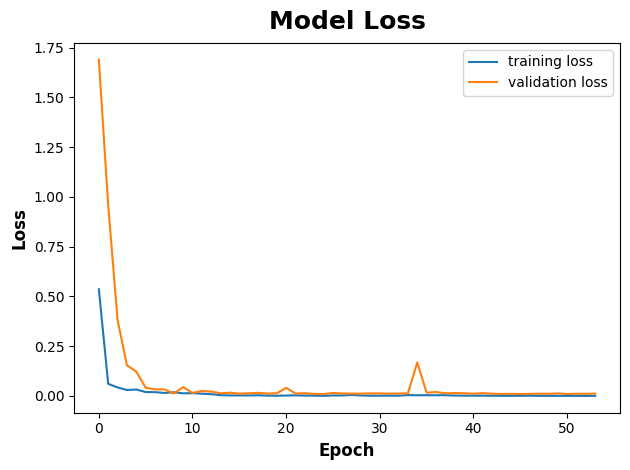

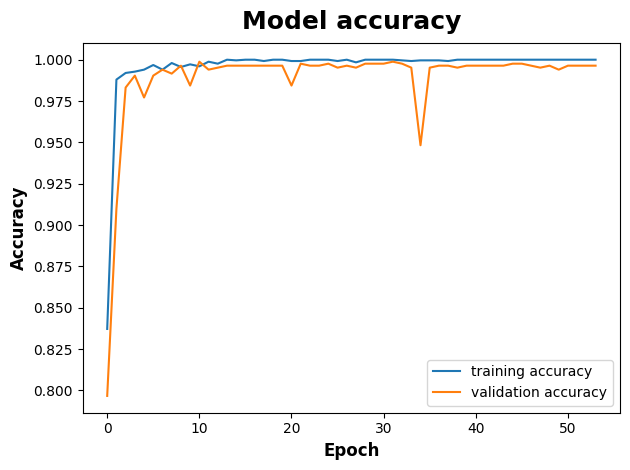

78/78 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step
['bb = black Bishop', 'bk = black King', 'bn = black Knight', 'bp = black Pawn', 'bq = black Queen', 'br = black Rook', 'emp = Empty', 'wb = white Bishop', 'wk = white King', 'wn = white Knight', 'wp = white Pawn', 'wq = white Queen', 'wr = white Rook']
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step
['bb = black Bishop', 'bk = black King', 'bn = black Knight', 'bp = black Pawn', 'bq = black Queen', 'br = black Rook', 'emp = Empty', 'wb = white Bishop', 'wk = white King', 'wn = white Knight', 'wp = white Pawn', 'wq = white Queen', 'wr = white Rook']
               precision    recall  f1-score   support

 black Bishop     1.0000    1.0000    1.0000        64
   black King     1.0000    1.0000    1.0000        63
 black Knight     1.0000    1.0000    1.0000        64
   black Pawn     1.0000    1.0000    1.0000        61
  black Queen     0.9841    1.0000    0.9920        62
   black Rook     1.0000    1.0000    1.0000        64
        Empty     1.0000   

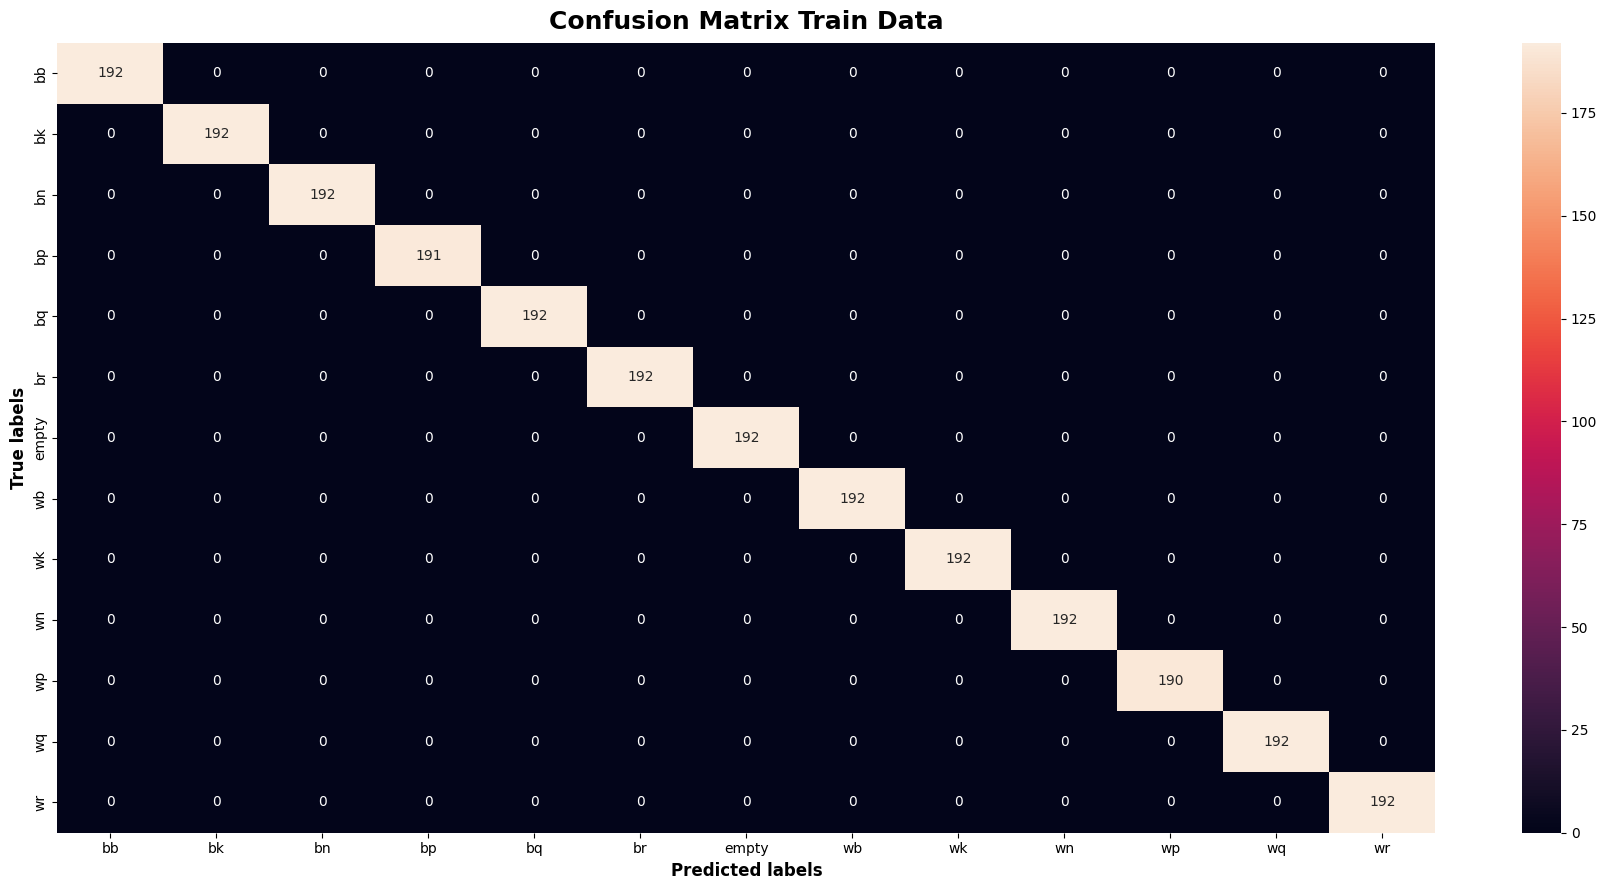

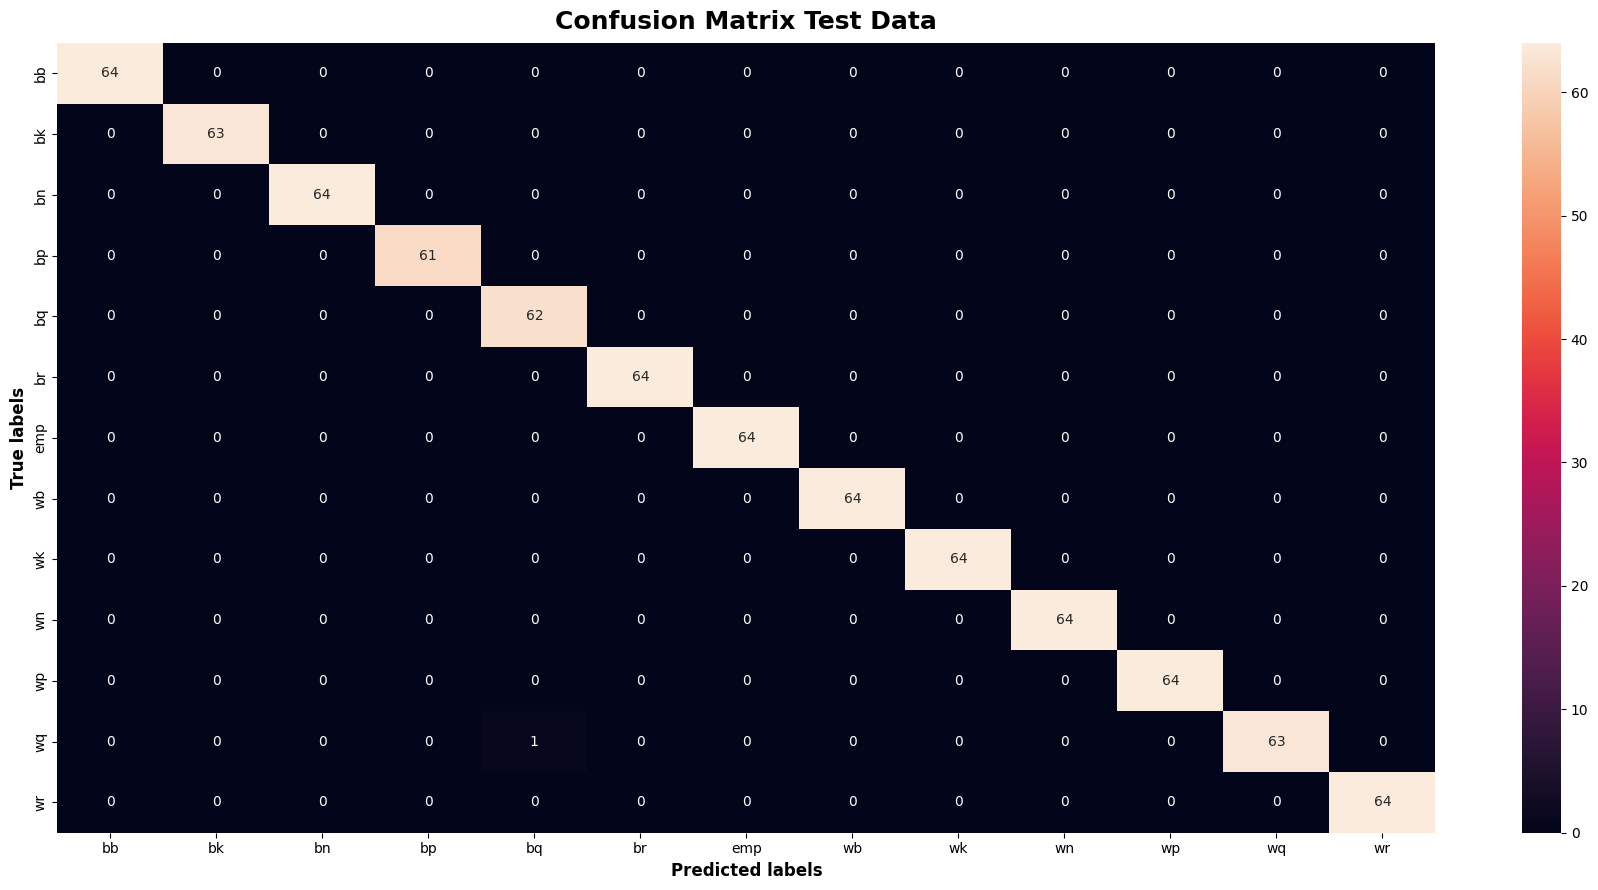

In [5]:
# Make a pandas dataframe so plots can be made from the model
history_frame = pd.DataFrame(history.history)

# Loss curve
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'])
plt.show()

# Accuracy curve
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

# metrics of the selected model
history_frame[history_frame.val_loss == history_frame.val_loss.min()]

# Get the labels from the training data
array_train = get_labels_from_tfdataset(train_images)
# Get the class probabilities from the model prediction on the training data
y_pred_train_prob = model.predict(train_images)
# Use the class probabilities from the model prediction to get class predictions
y_pred_train = np.argmax(y_pred_train_prob,axis=1)

# Get the true values of the training data
y_true_train = np.argmax(array_train,axis=1)

# Create a confusion matrix of the true classes compared to the predicted classes
cm_train = confusion_matrix(y_pred_train, y_true_train)

# now we plot the confusion matrix for the training data
plt.figure(figsize=(18,9))
ax_train = plt.subplot()
# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax_train);

# labels, title and ticks
ax_train.set_xlabel('Predicted labels');
ax_train.set_ylabel('True labels');
ax_train.set_title('Confusion Matrix Train Data');
ax_train.xaxis.set_ticklabels(['bb', 'bk', "bn", "bp", "bq", "br", "empty", "wb", "wk", "wn", "wp", "wq", "wr"]);
ax_train.yaxis.set_ticklabels(['bb', 'bk', "bn", "bp", "bq", "br", "empty", "wb", "wk", "wn", "wp", "wq", "wr"]);

# This serves as a legend which is too big for the plot
print(['bb = black Bishop', 'bk = black King', "bn = black Knight",
                "bp = black Pawn", "bq = black Queen", "br = black Rook",
                "emp = Empty", "wb = white Bishop", "wk = white King",
                "wn = white Knight","wp = white Pawn", "wq = white Queen",
                "wr = white Rook"])

# Get the labels from the test data
array_test = get_labels_from_tfdataset(test_images)
# Get the class probabilities from the model prediction on the test data
y_pred_test_prob = model.predict(test_images)
# Use the class probabilities from the model prediction to get class predictions
y_pred_test = np.argmax(y_pred_test_prob, axis=1)

# Get the true values of the training data
y_true_test = np.argmax(array_test,axis=1)

# Create a confusion matrix of the true classes compared to the predicted classes
cm_test = confusion_matrix(y_pred_test, y_true_test)

# now we plot the confusion matrix for the test data
plt.figure(figsize=(18,9))
ax_test = plt.subplot()
# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax_test);

# labels, title and ticks
ax_test.set_xlabel('Predicted labels');
ax_test.set_ylabel('True labels');
ax_test.set_title('Confusion Matrix Test Data');
ax_test.xaxis.set_ticklabels(['bb', 'bk', "bn", "bp", "bq", "br", "emp", "wb", "wk", "wn", "wp", "wq", "wr"]);
ax_test.yaxis.set_ticklabels(['bb', 'bk', "bn", "bp", "bq", "br", "emp", "wb", "wk", "wn", "wp", "wq", "wr"]);


# This serves as a legend which is too big for the plot
print(['bb = black Bishop', 'bk = black King', "bn = black Knight",
                "bp = black Pawn", "bq = black Queen", "br = black Rook",
                "emp = Empty", "wb = white Bishop", "wk = white King",
                "wn = white Knight","wp = white Pawn", "wq = white Queen",
                "wr = white Rook"])

# Creating a list of all the possible classes
target_names = ['black Bishop', 'black King', "black Knight",
                "black Pawn", "black Queen", "black Rook",
                "Empty", " white Bishop", "white King",
                "white Knight","white Pawn", "white Queen",
                "white Rook"]

# Making a classifcation report on the test data
print(classification_report(y_pred_test, y_true_test, target_names = target_names, digits = 4))
# Printing the overall accuracy of the model on the test data
print("total accuracy",accuracy_score(y_pred_test, y_true_test))

In [5]:
model.save("model_cnn.model")
#model.save("model_cnn_keras.keras")
#model.save("model_cnn_folder")
#model.save_weights("model_weights.weights.h5")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=model_cnn.model.

# References

Source: Detecting Chess Pieces with a CNN (Kaggle) (https://www.kaggle.com/code/thomassvisser/detecting-chess-pieces-with-a-cnn)